In [2]:
#Import libraries
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [3]:
#import dataset, dataset was downloaded from kaggle:https://www.kaggle.com/datasets/bartek358/train-delays
df=pd.read_csv("delays.csv")
df.head(2)

,datetime,id,carrier,date,connection,arrival,delay,name
0,2022-05-16 00:00:00,41002/3 (102) POLONIA,PKP Intercity,2022-05-15,Bohumin - Warszawa Wschodnia,21:31,162 min,Warszawa Zachodnia
1,2022-05-16 00:00:00,91888/9 (102),Koleje Mazowieckie,2022-05-16,Siedlce - Warszawa Zachodnia,00:15,0 min,Warszawa Zachodnia


In [6]:
#Check delay column values
df['delay'].value_counts()

0    2834968
1     883202
Name: delay, dtype: int64

In [5]:
#Change delay column to binary values
df['delay'] = np.where(df['delay']=="0 min",0,1)
df.head(2)

,datetime,id,carrier,date,connection,arrival,delay,name
0,2022-05-16 00:00:00,41002/3 (102) POLONIA,PKP Intercity,2022-05-15,Bohumin - Warszawa Wschodnia,21:31,1,Warszawa Zachodnia
1,2022-05-16 00:00:00,91888/9 (102),Koleje Mazowieckie,2022-05-16,Siedlce - Warszawa Zachodnia,00:15,0,Warszawa Zachodnia


In [7]:
#Filter for columns for classification
df_clas = df[["carrier","delay"]]

In [8]:
#create a dummy values for carrier column
dummies = pd.get_dummies(df_clas["carrier"])
dummies

,Arriva,Koleje Dolnośląskie,Koleje Mazowieckie,Koleje Wielkopolskie,Koleje Śląskie,PKP Intercity,PKP SKM w Trójmieście Sp. z o.o.,POLREGIO Sp. z o.o.,SKM Warszawa,Łódzka Kolej Aglomeracyjna
0,0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3718165,0,0,0,0,0,1,0,0,0,0
3718166,0,0,1,0,0,0,0,0,0,0
3718167,0,0,0,0,0,1,0,0,0,0
3718168,0,0,0,0,0,1,0,0,0,0


In [9]:
#Concat df_clas and dummies values
df_cl = pd.concat([df_clas,dummies],axis=1)
df_cl = df_cl[['delay', 'Arriva', 'Koleje Dolnośląskie', 'Koleje Mazowieckie', 'Koleje Wielkopolskie', 'Koleje Śląskie','PKP Intercity', 'PKP SKM w Trójmieście Sp. z o.o.', 'POLREGIO Sp. z o.o.', 'SKM Warszawa', 'Łódzka Kolej Aglomeracyjna']]

In [10]:
#Split data into X and y with reshape function
X = df_cl.iloc[:,1:]
y = df_cl.iloc[:, 0]

In [11]:
#Splitting data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
#Train LightGBM model

params = {
    'objective': 'binary',
    'boosting_type': 'gbdt',
    'metric': 'binary_logloss',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train)

num_round = 100
lgbm = lgb.train(params, lgb_train, num_round, valid_sets=lgb_test, early_stopping_rounds=10)

C:\Users\piotr\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 706416, number of negative: 2268120
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014833 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 20
[LightGBM] [Info] Number of data points in the train set: 2974536, number of used features: 10
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.237488 -> initscore=-1.166502
[LightGBM] [Info] Start training from score -1.166502
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_logloss: 0.541459
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_loglo

In [13]:
#Predict the test data using the trained model
y_pred = lgbm.predict(X_test)
y_pred = [1 if x >= 0.5 else 0 for x in y_pred]

In [14]:
#Check measures
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)

Accuracy: 0.7622674595298224
Confusion Matrix:
 [[566848      0]
 [176786      0]]


C:\Users\piotr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.87    566848
           1       0.00      0.00      0.00    176786

    accuracy                           0.76    743634
   macro avg       0.38      0.50      0.43    743634
weighted avg       0.58      0.76      0.66    743634



C:\Users\piotr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\piotr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


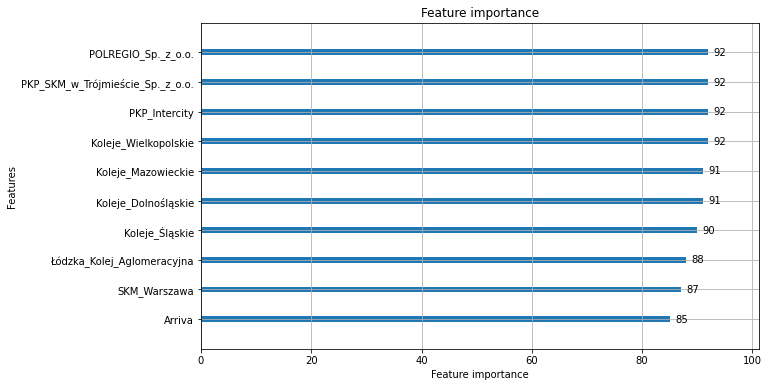

In [15]:
#Plot the future importance
lgb.plot_importance(lgbm, max_num_features=10, figsize=(10, 6))
plt.show()